<a href="https://colab.research.google.com/github/igomez666/coursera/blob/Ignacio/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN para clasificar MNIST

Cargamos librerias y el dataset.

Normalizamos las imágenes, redimensionamos a un canal y transformamos las etiquetas

In [ ]:
import keras
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical

# 1. Cargar y preprocesar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los valores de píxeles al rango [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Redimensionar las imágenes para que tengan un canal (escala de grises)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


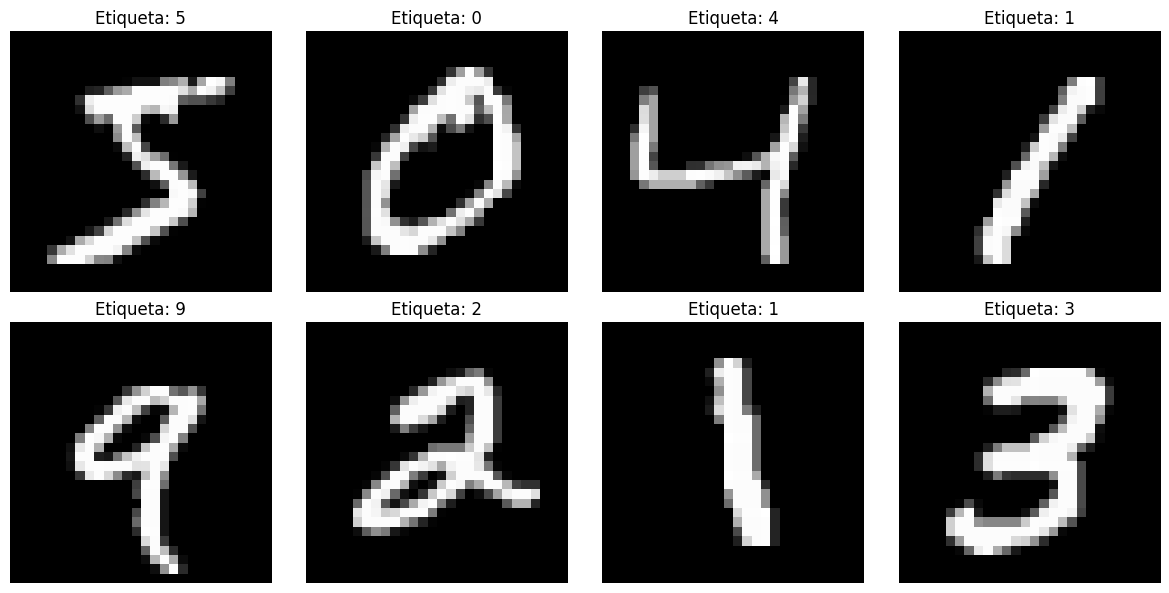

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mostrar 8 ejemplos del dataset
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Etiqueta: {np.argmax(y_train[i])}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:

# 2. Construir el modelo de la CNN
model = models.Sequential()

# Primera capa convolucional
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Segunda capa convolucional
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Tercera capa convolucional
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))

# Aplanar la salida para conectarla a una capa densa
model.add(layers.Flatten())

# Capa densa (fully connected)
model.add(layers.Dense(64, activation='relu'))

# Capa de salida (10 clases)
model.add(layers.Dense(10, activation='softmax'))

# 3. Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,330,890 (5.08 MB)

 Trainable params: 1,330,890 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

# 6. Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8249 - loss: 0.5258 - val_accuracy: 0.9860 - val_loss: 0.0457
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9826 - loss: 0.0549 - val_accuracy: 0.9909 - val_loss: 0.0276
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9880 - loss: 0.0391 - val_accuracy: 0.9905 - val_loss: 0.0263
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9911 - val_loss: 0.0258
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9924 - loss: 0.0229 - val_accuracy: 0.9937 - val_loss: 0.0212
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9925 - val_loss: 0.0226
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9945 - loss: 0.0174 - val_accuracy: 0.9924 - val_loss: 0.0262
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9947 - loss: 0.0162 - val_accuracy: 

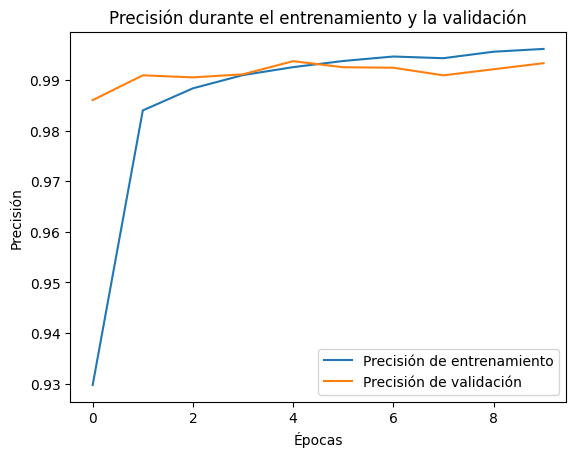

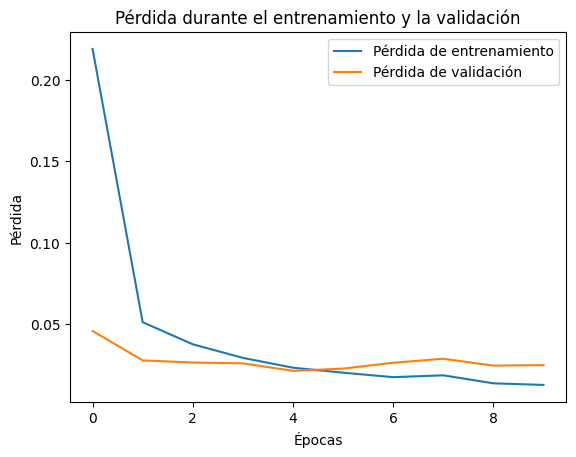

In [ ]:
import matplotlib.pyplot as plt

# Dibuja las curvas de precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Dibuja las curvas de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


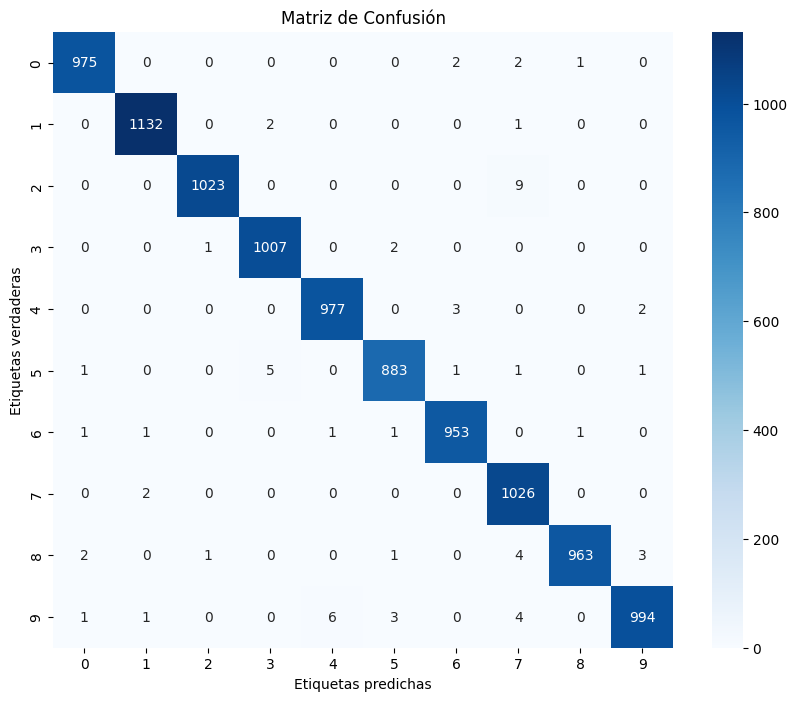

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir las etiquetas one-hot del conjunto de prueba a clases
y_true = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas')
plt.title('Matriz de Confusión')
plt.show()